# 제2장 대리점 데이터로 데이터를 가공하는 테크닉 10

In [1]:
# 경고(warning) 비표시
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

### 테크닉 11 : 데이터를 읽어들이자

In [2]:
uriage = pd.read_csv('uriage.csv')
kokyaku_daicho = pd.read_excel('kokyaku_daicho.xlsx')

print(uriage.head())
print(kokyaku_daicho.head())

      purchase_date item_name  item_price customer_name
0  2019-06-13 18:02       상품A       100.0           김가온
1  2019-07-13 13:05     상 품 S         NaN           김우찬
2  2019-05-11 19:42     상 품 a         NaN           김유찬
3  2019-02-12 23:40       상품Z      2600.0           김재현
4   2019-04-22 3:09       상품a         NaN           김강현
   고객이름  지역                  등록일
0  김 현성  H시  2018-01-04 00:00:00
1  김 도윤  E시                42782
2  김 지한  A시  2018-01-07 00:00:00
3  김 하윤  F시                42872
4  김 시온  E시                43127


### 테크닉 12 : 데이터의 오류를 살펴보자

In [3]:
uriage['purchase_date'] = pd.to_datetime(uriage['purchase_date'])
uriage['purchase_month'] = uriage['purchase_date'].dt.strftime('%Y%m')
res = pd.pivot_table(uriage, index='purchase_month', columns='item_name', aggfunc="size", fill_value=0)
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201906,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
201907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


### 테크닉 13 : 데이터에 오류가 있는 상태로 집계해보자

In [4]:
uriage['purchase_month'] = uriage['purchase_date'].dt.strftime('%Y%m')
res = pd.pivot_table(uriage, index='purchase_month', columns='item_name', values='item_price',aggfunc="sum", fill_value=0)
res


item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1400,0,0,0,0,0,0,0,0,0,...,1100,1200,1500,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,2400,0,0,0,...,0,0,0,0,0,1900,2000,2200,0,0
201903,0,500,1300,1600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,0,0,0,0,0,0,0,2300,0,1700,...,0,0,0,0,0,1900,0,0,0,0
201905,0,0,0,0,1900,0,0,0,0,0,...,0,1200,0,0,0,0,0,0,0,2500
201906,0,0,0,0,0,2300,0,0,0,0,...,0,0,0,1600,0,0,0,0,2400,0
201907,0,0,0,0,0,0,0,0,0,0,...,0,0,1500,0,1800,0,0,0,0,0


### 테크닉 14 : 상품명의 오류를 수정하자

In [5]:
print(len(pd.unique(uriage['item_name'])))

99


In [6]:
uriage['item_name'] = uriage['item_name'].str.upper()
uriage['item_name'] = uriage['item_name'].str.replace(' ', '')

uriage.sort_values(by=['item_name'], ascending=True)

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1748,2019-05-19 20:22:00,상품A,100.0,김시훈,201905
223,2019-06-25 08:13:00,상품A,100.0,김유진,201906
1742,2019-06-13 16:03:00,상품A,100.0,김건희,201906
1738,2019-02-10 00:28:00,상품A,100.0,김하랑,201902
...,...,...,...,...,...
2880,2019-04-22 00:36:00,상품Y,NaN,김동욱,201904
2881,2019-04-30 14:21:00,상품Y,NaN,김하준,201904
1525,2019-01-24 10:27:00,상품Y,2500.0,김범준,201901
1361,2019-05-28 13:45:00,상품Y,2500.0,김수현,201905


In [7]:
uriage

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1,2019-07-13 13:05:00,상품S,NaN,김우찬,201907
2,2019-05-11 19:42:00,상품A,NaN,김유찬,201905
3,2019-02-12 23:40:00,상품Z,2600.0,김재현,201902
4,2019-04-22 03:09:00,상품A,NaN,김강현,201904
...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품Y,2500.0,김정민,201902
2995,2019-06-22 04:03:00,상품M,1300.0,김재원,201906
2996,2019-03-29 11:14:00,상품Q,NaN,김지율,201903
2997,2019-07-14 12:56:00,상품H,NaN,김승주,201907


### 테크닉 15 : 금액의 결측치를 수정하자

In [8]:
uriage.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price         True
customer_name     False
purchase_month    False
dtype: bool

In [9]:
fig_is_null = uriage['item_price'].isnull()
fig_is_null

0       False
1        True
2        True
3       False
4        True
        ...  
2994    False
2995    False
2996     True
2997     True
2998    False
Name: item_price, Length: 2999, dtype: bool

In [10]:
for trg in list(uriage.loc[fig_is_null, "item_name"].unique()):
    price = uriage.loc[(~fig_is_null)&(uriage['item_name'] == trg),'item_price'].max()
    print(str(trg)+'의 최고 금액은' + str(price)+'임')
    uriage['item_price'].loc[(fig_is_null)&(uriage['item_name']==trg)] = price
# ~는 부정 연산자
uriage

상품S의 최고 금액은1900.0임
상품A의 최고 금액은100.0임
상품P의 최고 금액은1600.0임
상품N의 최고 금액은1400.0임
상품W의 최고 금액은2300.0임
상품R의 최고 금액은1800.0임
상품I의 최고 금액은900.0임
상품L의 최고 금액은1200.0임
상품F의 최고 금액은600.0임
상품O의 최고 금액은1500.0임
상품B의 최고 금액은200.0임
상품C의 최고 금액은300.0임
상품V의 최고 금액은2200.0임
상품Q의 최고 금액은1700.0임
상품U의 최고 금액은2100.0임
상품K의 최고 금액은1100.0임
상품T의 최고 금액은2000.0임
상품X의 최고 금액은2400.0임
상품E의 최고 금액은500.0임
상품M의 최고 금액은1300.0임
상품G의 최고 금액은700.0임
상품J의 최고 금액은1000.0임
상품D의 최고 금액은400.0임
상품H의 최고 금액은800.0임
상품Y의 최고 금액은2500.0임


,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1,2019-07-13 13:05:00,상품S,1900.0,김우찬,201907
2,2019-05-11 19:42:00,상품A,100.0,김유찬,201905
3,2019-02-12 23:40:00,상품Z,2600.0,김재현,201902
4,2019-04-22 03:09:00,상품A,100.0,김강현,201904
...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품Y,2500.0,김정민,201902
2995,2019-06-22 04:03:00,상품M,1300.0,김재원,201906
2996,2019-03-29 11:14:00,상품Q,1700.0,김지율,201903
2997,2019-07-14 12:56:00,상품H,800.0,김승주,201907


### 테크닉 16 : 고객이름의 오류를 수정하자

In [11]:
kokyaku_daicho['고객이름'] = kokyaku_daicho['고객이름'].str.replace(' ','')
kokyaku_daicho.head()

,고객이름,지역,등록일
0,김현성,H시,2018-01-04 00:00:00
1,김도윤,E시,42782
2,김지한,A시,2018-01-07 00:00:00
3,김하윤,F시,42872
4,김시온,E시,43127


### 테크닉 17 : 날짜오류를 수정하자

In [12]:
fig_is_serial = kokyaku_daicho['등록일'].astype('str').str.isdigit()
fig_is_serial.sum()

22

In [13]:
fromSerial = pd.to_timedelta(kokyaku_daicho.loc[fig_is_serial, '등록일'].astype("float"), unit="D") + pd.to_datetime('1900/01/01')
fromSerial

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 등록일, dtype: datetime64[ns]

In [14]:
fromString = pd.to_datetime(kokyaku_daicho.loc[~fig_is_serial, '등록일'])
fromString

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 등록일, Length: 178, dtype: datetime64[ns]

In [15]:
kokyaku_daicho['등록일'] = pd.concat([fromSerial, fromString])
kokyaku_daicho

,고객이름,지역,등록일
0,김현성,H시,2018-01-04
1,김도윤,E시,2017-02-18
2,김지한,A시,2018-01-07
3,김하윤,F시,2017-05-19
4,김시온,E시,2018-01-29
...,...,...,...
195,김재희,G시,2017-06-20
196,김도영,E시,2018-06-20
197,김이안,F시,2017-04-29
198,김시현,H시,2019-04-19


In [16]:
kokyaku_daicho['등록연월'] = kokyaku_daicho['등록일'].dt.strftime("%Y%m")
kokyaku_daicho.head()

,고객이름,지역,등록일,등록연월
0,김현성,H시,2018-01-04,201801
1,김도윤,E시,2017-02-18,201702
2,김지한,A시,2018-01-07,201801
3,김하윤,F시,2017-05-19,201705
4,김시온,E시,2018-01-29,201801


In [17]:
rslt = kokyaku_daicho.groupby('등록연월').count()['고객이름']
print(rslt)
print(len(kokyaku_daicho))

등록연월
201701    15
201702    11
201703    14
201704    15
201705    13
201706    14
201707    17
201801    13
201802    15
201803    17
201804     5
201805    19
201806    13
201807    17
201904     2
Name: 고객이름, dtype: int64
200


### 테크닉 18 : 고객이름을 키로 두개의 데이터를 결합(조인)하자

In [19]:
join_data = pd.merge(uriage, kokyaku_daicho, left_on="customer_name", right_on="고객이름",how="left")
join_data.head()

,purchase_date,item_name,item_price,customer_name,purchase_month,고객이름,지역,등록일,등록연월
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906,김가온,C시,2017-01-26,201701
1,2019-07-13 13:05:00,상품S,1900.0,김우찬,201907,김우찬,C시,2018-04-07,201804
2,2019-05-11 19:42:00,상품A,100.0,김유찬,201905,김유찬,A시,2018-06-19,201806
3,2019-02-12 23:40:00,상품Z,2600.0,김재현,201902,김재현,D시,2018-07-22,201807
4,2019-04-22 03:09:00,상품A,100.0,김강현,201904,김강현,D시,2017-06-07,201706


### 테크닉 19 : 정제한 데이터를 덤프하자

In [20]:
dump_date = join_data[['purchase_date', 'purchase_month','item_name', 'item_price','고객이름', '지역','등록일']]

In [24]:
dump_date.to_csv('dump_date.csv', index=False)

### 테크닉 20 : 데이터를 집계하자

In [26]:
import_data = pd.read_csv('dump_date.csv')
import_data.head()

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02:00,201906,상품A,100.0,김가온,C시,2017-01-26 00:00:00
1,2019-07-13 13:05:00,201907,상품S,1900.0,김우찬,C시,2018-04-07 00:00:00
2,2019-05-11 19:42:00,201905,상품A,100.0,김유찬,A시,2018-06-19 00:00:00
3,2019-02-12 23:40:00,201902,상품Z,2600.0,김재현,D시,2018-07-22 00:00:00
4,2019-04-22 03:09:00,201904,상품A,100.0,김강현,D시,2017-06-07 00:00:00


In [31]:
# size = count
pivotItem = import_data.pivot_table(index='purchase_month', columns='item_name', aggfunc="size", fill_value=0)
pivotItem

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
201902,19,14,26,21,16,14,14,17,12,14,...,22,22,22,23,19,22,24,16,11,1
201903,17,21,20,17,9,27,14,18,12,16,...,23,16,20,12,23,18,16,21,16,0
201904,17,19,24,20,18,17,14,11,18,13,...,20,20,16,16,11,15,14,16,20,0
201905,24,14,16,14,19,18,23,15,16,11,...,13,22,18,16,16,9,21,16,20,0
201906,24,12,11,19,13,18,15,13,19,22,...,15,16,21,12,18,20,17,15,13,0
201907,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


<AxesSubplot:xlabel='purchase_month'>

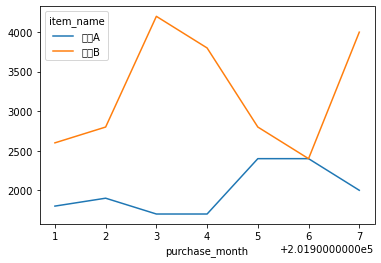

In [40]:
byPrice = import_data.pivot_table(index='purchase_month',columns='item_name', aggfunc='sum', values='item_price', fill_value=0)
byPrice[['상품A','상품B']].plot()